In [21]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from SciKit.utils import split_500_hits, show_report

In [22]:
# load data
X_train, X_test, y_train, y_test = split_500_hits()

In [23]:
# scale data
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
# build model
knn_model = KNeighborsClassifier(n_neighbors=8)

knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        70
           1       0.65      0.87      0.74        23

    accuracy                           0.85        93
   macro avg       0.80      0.86      0.82        93
weighted avg       0.88      0.85      0.86        93

Accuracy:  0.8494623655913979
Confusion Matrix: 
 [[59 11]
 [ 3 20]]


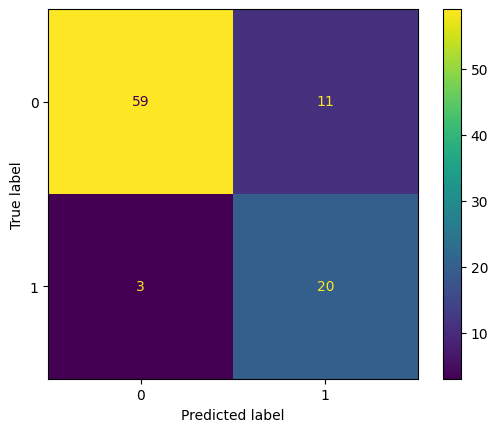

In [25]:
# evaluate model
show_report(y_test, y_predict)